**Part 2. AI Agent 활용 프로젝트**

- Chapter 03. N개 이상의 Agent

    - **📒[실습]** Clip 02. Multi Agent를 위한 필수 개념과 구현(HandOffs, Command, ...)

## HandOffs (핸드오프)

- 한 에이전트가 다른 에이전트에게 제어권을 넘겨주는 Multi Agent 상호작용 방식

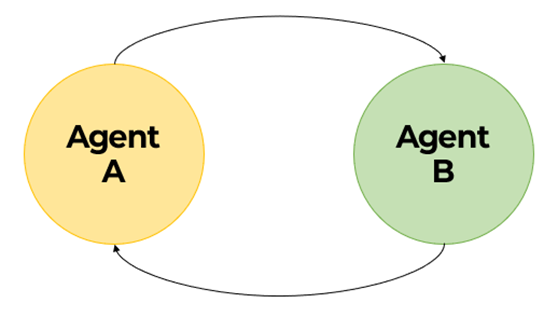

- Command 사용하기

In [1]:
from typing import Literal
from langgraph.types import Command
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.messages import AIMessage

def agent_1(state: MessagesState):
    messages = AIMessage(content="This is a message from agent 1.")
    return Command(
        goto="agent_2", 
        update={"messages": [messages]}
    )

def agent_2(state: MessagesState):
    message = AIMessage(content="This is a message from agent 2.")
    return Command(
        goto=END,
        update={"messages": [message]},
    )

graph_builder = StateGraph(MessagesState)
graph_builder.add_node("agent_1", agent_1)
graph_builder.add_node("agent_2", agent_2)

graph_builder.add_edge(START, "agent_1")

graph = graph_builder.compile()

In [2]:
for chunk in graph.stream({"messages" : []}, stream_mode="values"):
    print(chunk)

{'messages': []}
{'messages': [AIMessage(content='This is a message from agent 1.', additional_kwargs={}, response_metadata={}, id='2eeea737-8fdf-4fa5-a0f2-d533c6902c26')]}
{'messages': [AIMessage(content='This is a message from agent 1.', additional_kwargs={}, response_metadata={}, id='2eeea737-8fdf-4fa5-a0f2-d533c6902c26'), AIMessage(content='This is a message from agent 2.', additional_kwargs={}, response_metadata={}, id='03f81c1b-33ed-4731-81bb-d1bd0981d2f1')]}


- Command로 HandOffs 구현하기 (서브그래프)

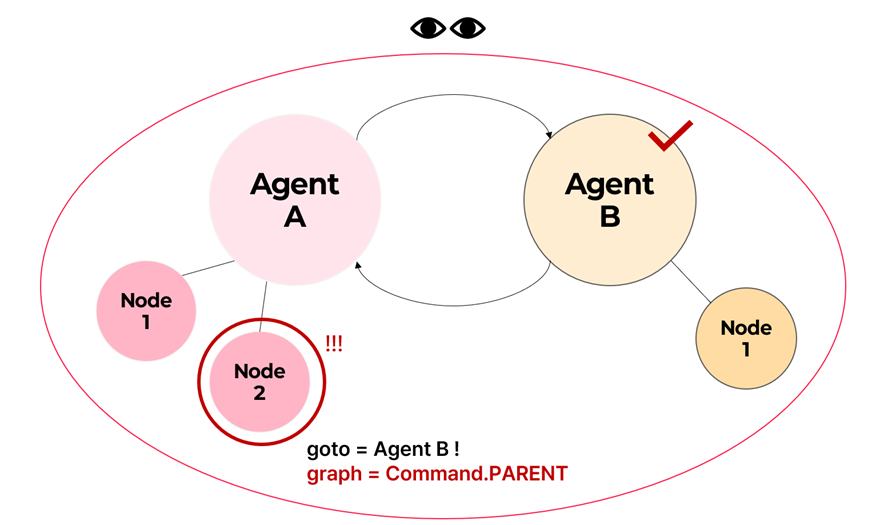

In [3]:
def node2(state):
    return Command(
        goto="AgentB",
        update={"my_state_key": "my_state_value"},
        graph=Command.PARENT,
    )

- HandOffs as Tool

In [4]:
from langchain_core.tools import tool

@tool
def transfer_to_book():
    """Transfer to book."""
    return Command(
        goto="book",
        update={"my_state_key": "my_state_value"},
        graph=Command.PARENT,
    )